In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Random_Searcher
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
def random_inits(N, x_min=-4.0, x_max=4.0, y_min=-4.0, y_max=4.0):
    ns = np.random.rand(N,2)
    ns[:,0]*=(x_max-x_min)
    ns[:,0]+=x_min
    ns[:,1]*=(y_max-y_min)
    ns[:,1]+=y_min
    return ns

def create_atom_col(N_atoms, grid_size, fixed_col="C1", non_fixed_col="C0"):
    atom_list = []
    colors = [fixed_col] + [non_fixed_col for i in range(N_atoms-1)]
    init_pos = random_inits(N=N_atoms-1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    init_pos_fixed = np.array([0.0,0.0])
    new_arr = np.insert(init_pos,0, init_pos_fixed).reshape(N_atoms, 2)
    for pos, col in zip(new_arr, colors):
        atom = Atom(pos, color=col)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[0])
    return atom_col

# $N=5$:  Atomic cluster
## Before line-search:

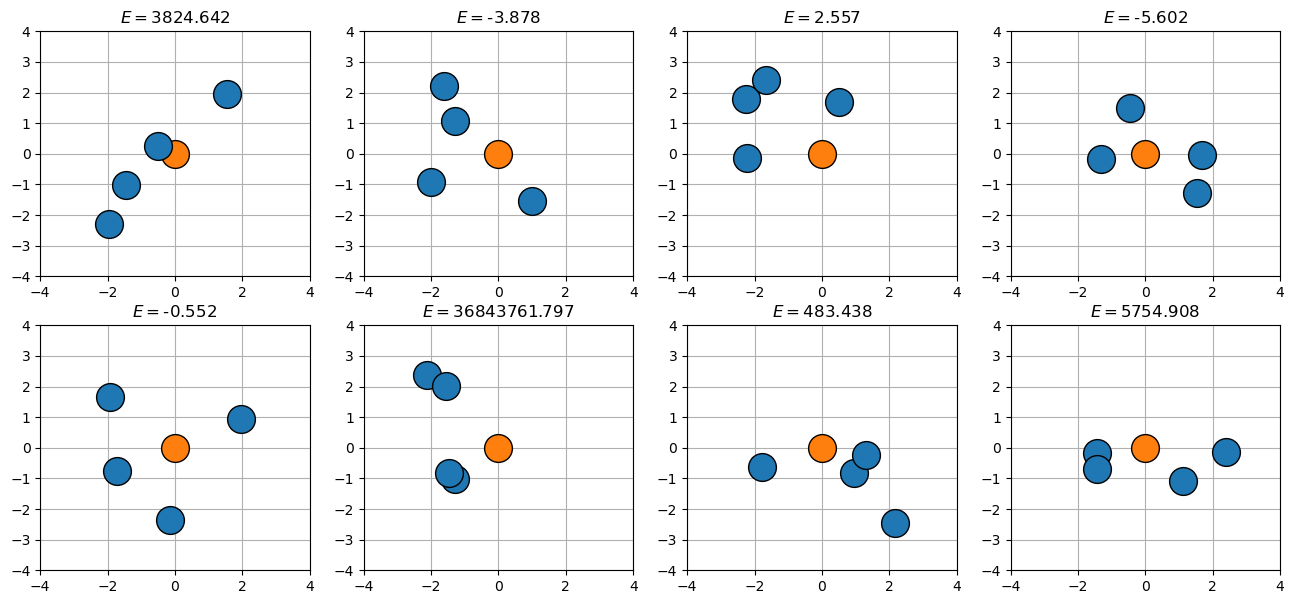

In [3]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_cols = []
sizes = [20.0 for i in range(5)]
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(5, [-2.5,2.5])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_col.plot(ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

## After Line-search

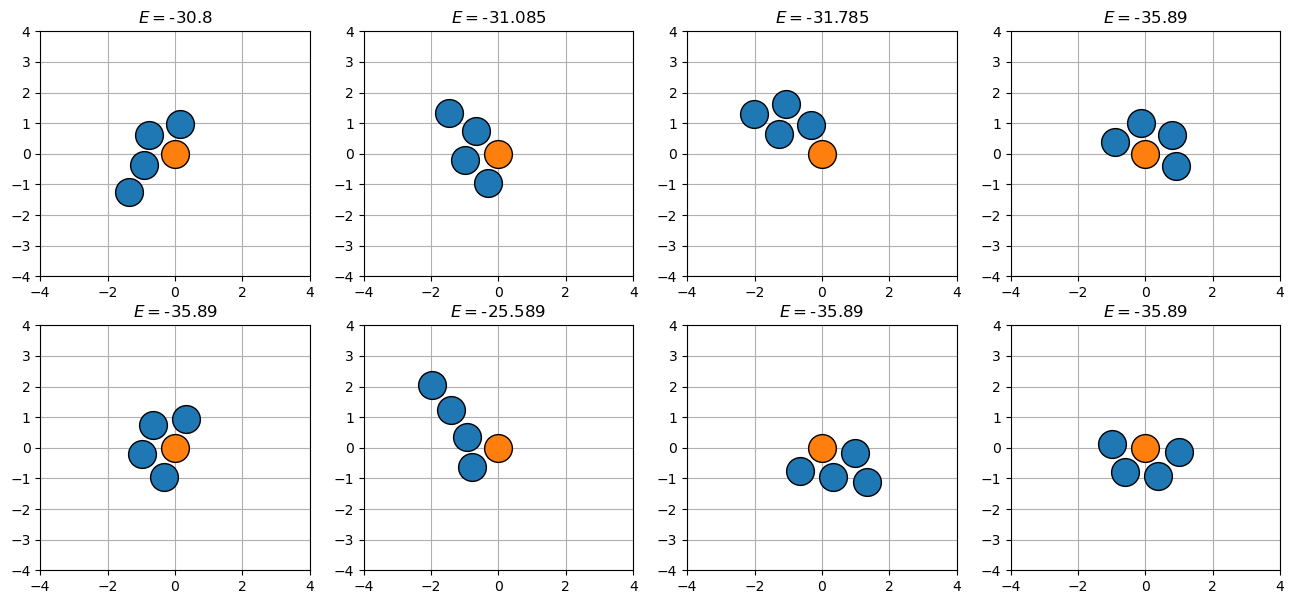

In [4]:
optimizer = Random_Searcher(atom_col=atom_cols[0], step_size=0.1)
opt_cols = []
for atom_col in atom_cols:
    opt_col = copy.deepcopy(atom_col)
    optimizer.line_search(opt_col, N_max=300)
    opt_cols.append(opt_col)

fig, axs = plt.subplots(2,4, figsize=(16,7))
sizes = [25.0 for i in range(5)]
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.plot(ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

# $N=7$:  Atomic cluster
## Before line-search:

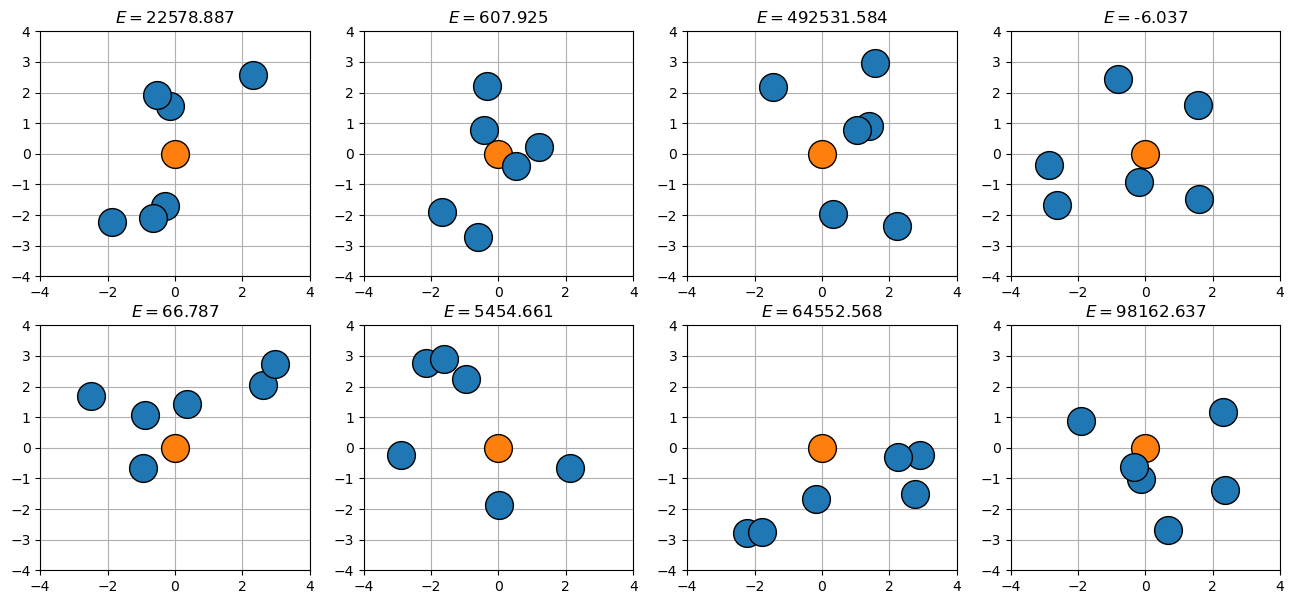

In [5]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_cols = []
N_atoms = 7
sizes = [20.0 for i in range(N_atoms)]
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_col.plot(ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

## After line-search:

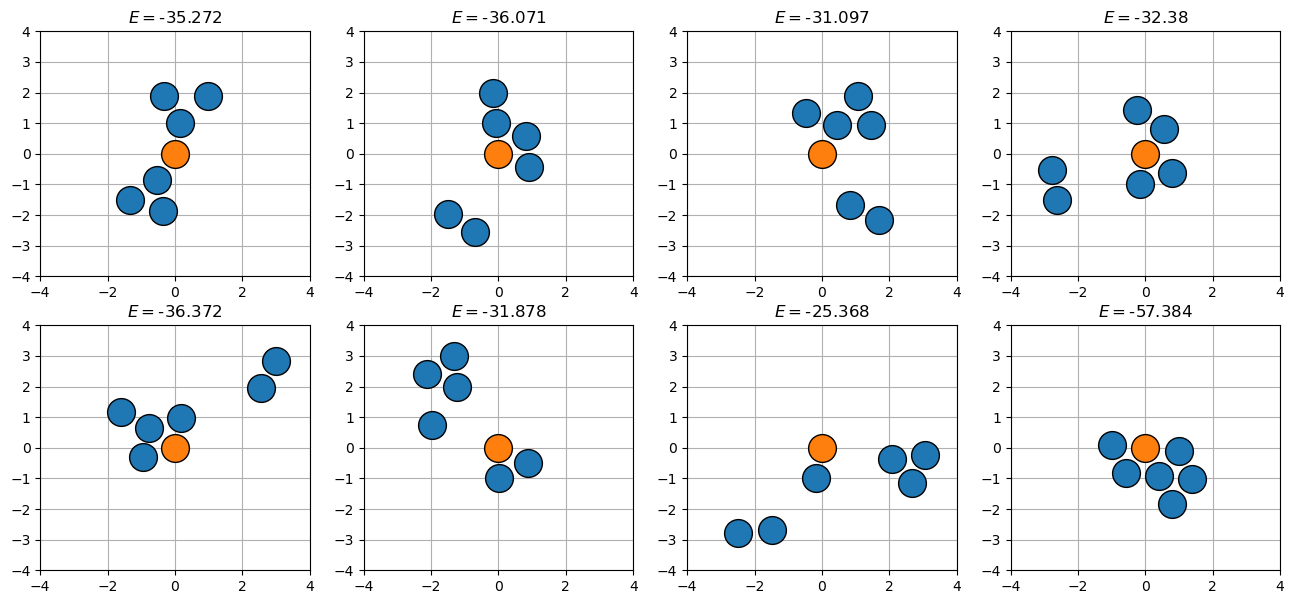

In [6]:
optimizer = Random_Searcher(atom_col=atom_cols[0], step_size=0.1)
opt_cols = []
for atom_col in atom_cols:
    opt_col = copy.deepcopy(atom_col)
    optimizer.line_search(opt_col, N_max=100)
    opt_cols.append(opt_col)

fig, axs = plt.subplots(2,4, figsize=(16,7))
sizes = [25.0 for i in range(5)]
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.plot(ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

# $N=17$:  Atomic cluster
## Before line-search:

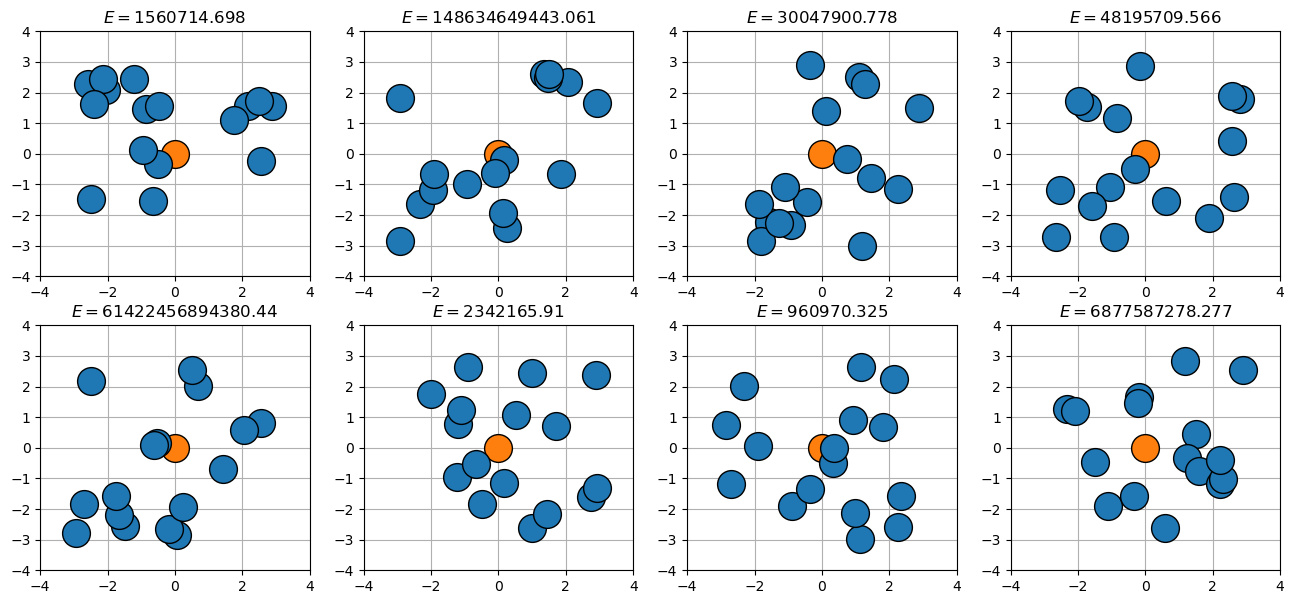

In [7]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_cols = []
N_atoms = 17
sizes = [20.0 for i in range(N_atoms)]
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_col.plot(ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

## After Line-search

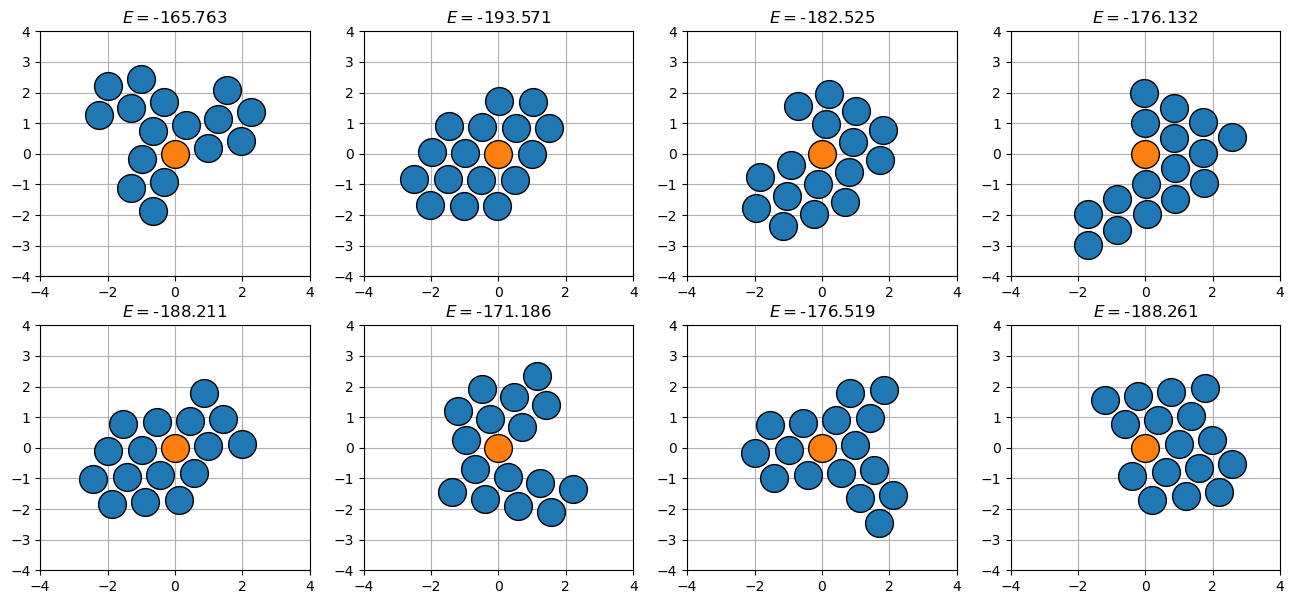

In [8]:
optimizer = Random_Searcher(atom_col=atom_cols[0], step_size=0.1)
opt_cols = []
for atom_col in atom_cols:
    opt_col = copy.deepcopy(atom_col)
    optimizer.line_search(opt_col)
    opt_cols.append(opt_col)

fig, axs = plt.subplots(2,4, figsize=(16,7))
sizes = [25.0 for i in range(5)]
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.plot(ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

In [11]:
print(opt_cols[1].get_forces())

[[ 0.19570563 -0.09957148]
 [ 0.03497197  0.01431564]
 [-0.04718891 -0.04953886]
 [-0.00981657 -0.03577802]
 [-0.04984391 -0.00746899]
 [-0.13708306 -0.0603948 ]
 [-0.00956201  0.0358076 ]
 [-0.0536495  -0.00593977]
 [ 0.04270069  0.03815492]
 [ 0.04191207  0.06243146]
 [-0.14027422 -0.02216666]
 [-0.01171909 -0.01173075]
 [ 0.00045813  0.04565367]
 [ 0.04314171  0.06888848]
 [ 0.04853424 -0.00374309]
 [ 0.04448245  0.01473279]
 [ 0.00723038  0.01634788]]
